In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# Trocar aqui o caminho do dataset
df = pd.read_csv("/content/drive/MyDrive/Trilhas Inova/Desafio V/Copy of Planilha do desafio 5 - Ciência de dados - Relatório do Banco x.csv")
df

,Id,Pontos,Estado,Genero,Idade,Bens,Saldo na Conta,Produto,Possui cartao,Ativo,Salario,Saiu
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,CE,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,CE,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,CE,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,CE,Masculino,62,7,12128627,1,0,1,677692.0,0


In [48]:
df.columns = [col.upper() for col in df.columns]

df['SALDO NA CONTA'].fillna(df['SALDO NA CONTA'].mean(), inplace=True)
df['SALARIO'].fillna(df['SALARIO'].mean(), inplace=True)
df['GENERO'].fillna(df['GENERO'].mode()[0], inplace=True)
df['ESTADO'].fillna(df['ESTADO'].mode()[0], inplace=True)
df['PRODUTO'].fillna(df['PRODUTO'].mode()[0], inplace=True)
df['POSSUI CARTAO'].fillna(df['POSSUI CARTAO'].mode()[0], inplace=True)
df['ATIVO'].fillna(df['ATIVO'].mode()[0], inplace=True)

df.drop_duplicates(inplace=True)

df['IDADE'] = df['IDADE'].astype(int)

df.head()

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU
0,1,619,BA,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,CE,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,BA,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,BA,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,CE,Feminino,43,2,12551082,1,1,1,790841.0,0


In [49]:
print(df['GENERO'].unique())

['Feminino' 'Masculino' 'M' 'F' 'Fem']


In [50]:
df['GENERO'] = df['GENERO'].replace({'M': 'Masculino', 'F': 'Feminino', 'Fem': 'Feminino'})
print(df['GENERO'].unique())


['Feminino' 'Masculino']


In [51]:
df[df.duplicated(keep=False)]

,ID,PONTOS,ESTADO,GENERO,IDADE,BENS,SALDO NA CONTA,PRODUTO,POSSUI CARTAO,ATIVO,SALARIO,SAIU


In [34]:
Q1 = df['SALARIO'].quantile(0.25)
Q3 = df['SALARIO'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['SALARIO'] >= lower_bound) & (df['SALARIO'] <= upper_bound)]

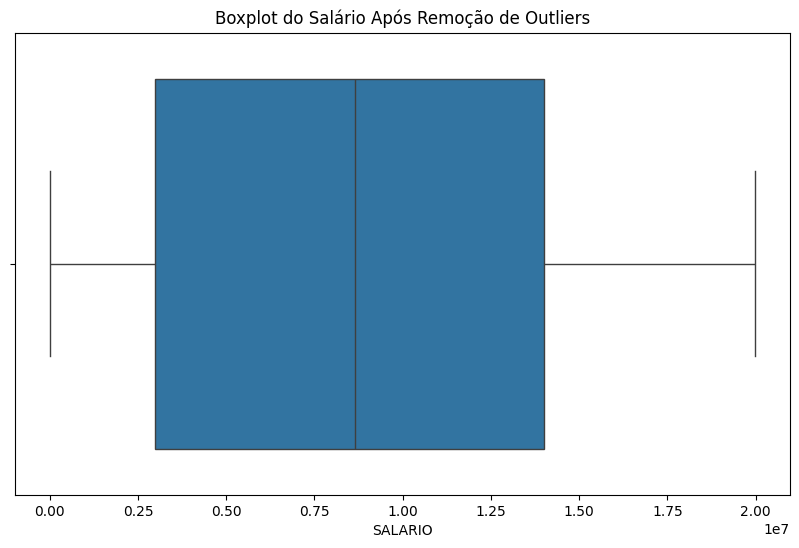

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SALARIO'])
plt.title('Boxplot do Salário Após Remoção de Outliers')
plt.show()

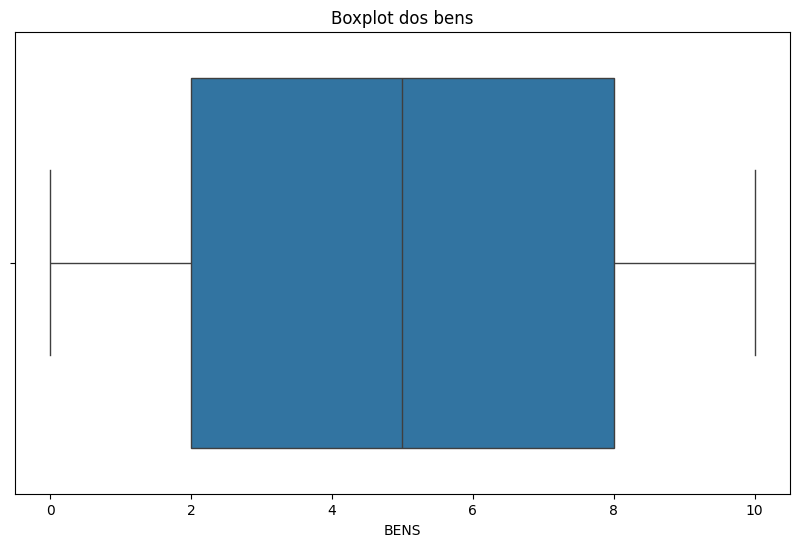

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BENS'])
plt.title('Boxplot dos bens')
plt.show()

In [37]:
df.to_excel("tratamento.xlsx")